<H3>Basic Model1 Analysis</H3>
It is important that an experiment has been ran with <code>LoggingP=true</code> in the <code>Model1.properties</code> file before running this notebook.
<br>You also need to set <code>Model=1</code> in <code>application.properties</code>

In [7]:
import pandas as pd
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 120)
%matplotlib inline

In [8]:
# load all particle data from simulator
particles = pd.read_csv('csv/P-1-p.csv')

In [9]:
# generate a DataFrame with perimeter count per step
group = particles[["STEP","PERIM"]].query("PERIM == True").groupby('STEP').count().reset_index()

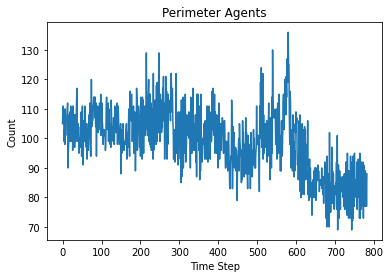

In [10]:
plt.plot(group.STEP,group.PERIM)
plt.title("Perimeter Agents")
plt.xlabel("Time Step")
plt.ylabel("Count")
plt.show()

In [11]:
group1 = particles[["STEP","IMAG"]].groupby('STEP').mean(0).reset_index()

In [12]:
group2 = particles[["STEP","IMAG"]].groupby('STEP').std(0).reset_index()

In [13]:
group3 = particles[["STEP","IMAG"]].groupby('STEP').max(0).reset_index()

In [14]:
group4 = particles[["STEP","IMAG"]].groupby('STEP').min(0).reset_index()

In [15]:
%matplotlib qt
a, = plt.plot(group3.STEP,group3.IMAG,label='max')
b, = plt.plot(group1.STEP,group1.IMAG,label='mean')
c, = plt.plot(group2.STEP,group2.IMAG,label='std')
d, = plt.plot(group4.STEP,group4.IMAG,label='min')
plt.title("Inter-agent Aggregated Magnitude")
plt.legend()
plt.xlabel("Time Step")
plt.ylabel("Magnitude")
plt.show()